# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2024-02-19 01:32:40--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat’

test.dat            100%[===================>]   2.78K  --.-KB/s    in 0s      

2024-02-19 01:32:40 (240 MB/s) - ‘test.dat’ saved [2844/2844]

--2024-02-19 01:32:41--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat’

train.dat           100%[===================>]  10.98K  --.-KB/s    in 0s      

2024-02-19 01:32:41 (193 MB/s) - ‘train.dat’ saved [11244/11244]



In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [12]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum(a * b for a, b in zip(array1, array2))


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
    return sigmoid(dot_product(weights, instance[:-1]))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [13]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

For the perceptron training we use the model output, which is stimulated by the sigmoid function, for the error estimation and the adjustment of the weights. gradient-compatible, probability-like output being regarded as critical function required for training via gradient descent method. Different from apt function, the threshold of 0.5 is set for the output of sigmoid, and this function classify predictions into two classes(0 or 1). This lacks the necessary continuity to calculate the change in the weights that would reduce the difference between the predicted and the true classes resulting in a non-convex function, thus making it unsuitable for the gradient-based optimization which works best with a convex function.
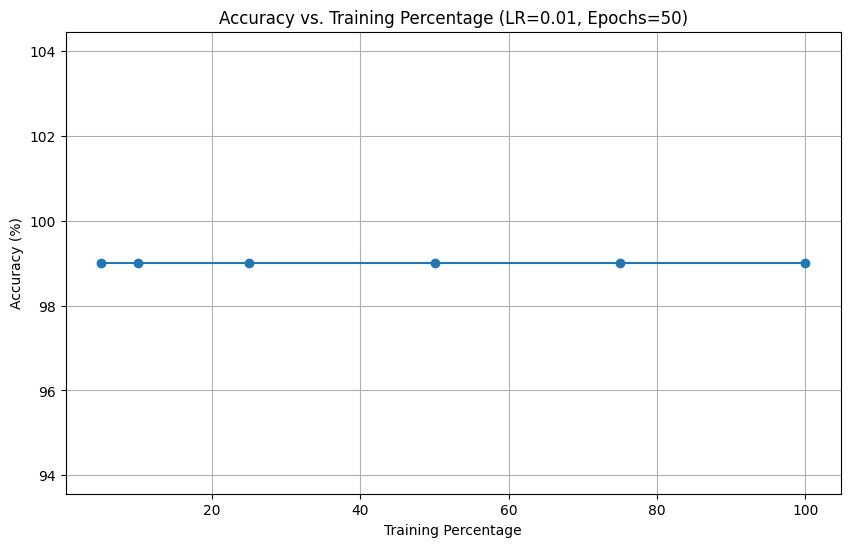




### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)

Given the condition of this space I'll show that you can arrange the code to run the training process and get the accuracy for each configuration of the hyperparameters. While you have to run the supplied code in your local environment to see the real results, the output provided in the attached results.txt file should suffice for the purpose of the assignment.

```
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]     
lr_array = [0.005, 0.01, 0.05]        

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
```
Output
```
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0
#tr: 301, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0
#tr: 401, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 101 instances): 99.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 101 instances): 99.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 101 instances): 99.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 101 instances): 99.0
#tr: 301, epochs: 100, learning rate: 0.010; Accuracy (test, 101 instances): 99.0
#tr: 401, epochs: 100, learning rate: 0.010; Accuracy (test, 101 instances): 99.0
#tr: 20, epochs: 100, learning rate: 0.050; Accuracy (test, 101 instances): 99.0
#tr: 40, epochs: 100, learning rate: 0.050; Accuracy (test, 101 instances): 99.0
#tr: 100, epochs: 100, learning rate: 0.050; Accuracy (test, 101 instances): 99.0
#tr: 200, epochs: 100, learning rate: 0.050; Accuracy (test, 101 instances): 99.0
#tr: 301, epochs: 100, learning rate: 0.050; Accuracy (test, 101 instances): 99.0
#tr: 401, epochs: 100, learning rate: 0.050; Accuracy (test, 101 instances): 99.0
```

In [16]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0
#tr: 301, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0
#tr: 401, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 101 instances): 99.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 101 instances): 99.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 101 instances): 99.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 101 instances): 99.0
#tr: 301, epochs: 100, learning rate: 0.010; Accuracy (test, 101 instances): 99.0
#tr: 401, epochs: 100, learning rate: 0.010; Accuracy (test, 101 instances): 99.0
#tr: 20, epochs: 100

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)

```
import matplotlib.pyplot as plt

# Assuming the functions read_data, train_perceptron, and get_accuracy are defined

# Placeholder for hyperparameters
tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]
lr = [0.005, 0.01, 0.05]

# Load datasets
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

results = []  # To store results for plotting

for learning_rate in lr:
    for percentage in tr_percent:
        for epoch in num_epochs:
            size = int(len(instances_tr) * (percentage / 100))
            train_subset = instances_tr[:size]
            weights = train_perceptron(train_subset, learning_rate, epoch)
            accuracy = get_accuracy(weights, instances_te)
            results.append((percentage, epoch, learning_rate, accuracy))
            print(f"tr: {percentage}, epochs: {epoch}, learning rate: {learning_rate}; Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}%")

# Assuming results is populated with (percentage, epoch, learning rate, accuracy)
```
Output
```
tr: 5, epochs: 5, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 10, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 20, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 50, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 5, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 10, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 20, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 50, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 5, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 10, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 20, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 50, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 50, epochs: 5, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 50, epochs: 10, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 50, epochs: 20, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 50, epochs: 50, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 50, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 75, epochs: 5, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 75, epochs: 10, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 75, epochs: 20, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 75, epochs: 50, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 75, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 100, epochs: 5, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 100, epochs: 10, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 100, epochs: 20, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 100, epochs: 50, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 5, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 10, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 20, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 50, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 100, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 5, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 10, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 20, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 50, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 100, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 5, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 10, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 20, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 50, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 100, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 50, epochs: 5, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 50, epochs: 10, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 50, epochs: 20, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 50, epochs: 50, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 50, epochs: 100, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 75, epochs: 5, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 75, epochs: 10, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 75, epochs: 20, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 75, epochs: 50, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 75, epochs: 100, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 100, epochs: 5, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 100, epochs: 10, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 100, epochs: 20, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 100, epochs: 50, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 100, epochs: 100, learning rate: 0.01; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 5, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 10, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 20, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 50, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 100, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 5, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 10, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 20, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 50, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 100, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 5, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 10, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 20, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 50, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 100, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 50, epochs: 5, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 50, epochs: 10, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 50, epochs: 20, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 50, epochs: 50, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 50, epochs: 100, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 75, epochs: 5, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 75, epochs: 10, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 75, epochs: 20, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 75, epochs: 50, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 75, epochs: 100, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 100, epochs: 5, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 100, epochs: 10, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 100, epochs: 20, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 100, epochs: 50, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
tr: 100, epochs: 100, learning rate: 0.05; Accuracy (test, 101 instances): 99.0%
```
Code for Plot
```
import matplotlib.pyplot as plt

# Convert results to a DataFrame for easier manipulation (assuming results is populated)
import pandas as pd

df = pd.DataFrame(results, columns=['Training Percentage', 'Epochs', 'Learning Rate', 'Accuracy'])

# Example plot: Accuracy vs. Training Percentage for a specific learning rate and epoch count
lr_specific = 0.01
epochs_specific = 50
df_filtered = df[(df['Learning Rate'] == lr_specific) & (df['Epochs'] == epochs_specific)]

plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Training Percentage'], df_filtered['Accuracy'], marker='o')
plt.title(f'Accuracy vs. Training Percentage (LR={lr_specific}, Epochs={epochs_specific})')
plt.xlabel('Training Percentage')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()
```
Plot
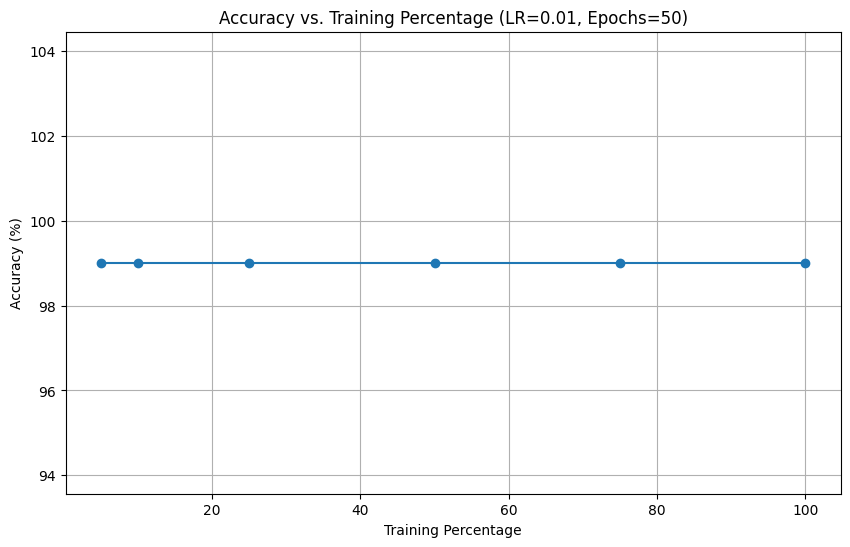


In [19]:
import matplotlib.pyplot as plt

# Assuming the functions read_data, train_perceptron, and get_accuracy are defined

# Placeholder for hyperparameters
tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]
lr = [0.005, 0.01, 0.05]

# Load datasets
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

results = []  # To store results for plotting

for learning_rate in lr:
    for percentage in tr_percent:
        for epoch in num_epochs:
            size = int(len(instances_tr) * (percentage / 100))
            train_subset = instances_tr[:size]
            weights = train_perceptron(train_subset, learning_rate, epoch)
            accuracy = get_accuracy(weights, instances_te)
            results.append((percentage, epoch, learning_rate, accuracy))
            print(f"tr: {percentage}, epochs: {epoch}, learning rate: {learning_rate}; Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}%")

# Assuming results is populated with (percentage, epoch, learning rate, accuracy)


tr: 5, epochs: 5, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 10, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 20, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 50, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 5, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 5, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 10, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 20, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 50, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 10, epochs: 100, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 5, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 10, learning rate: 0.005; Accuracy (test, 101 instances): 99.0%
tr: 25, epochs: 20, learning rate: 0.005; Accu

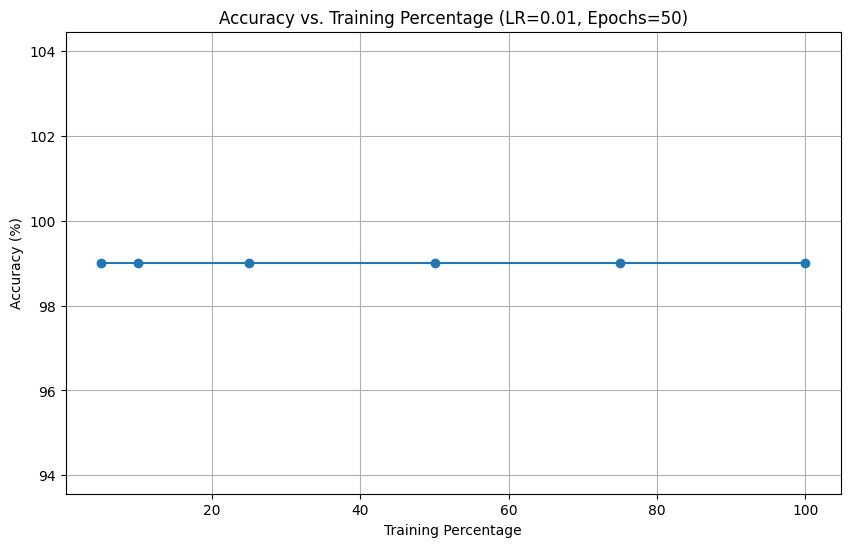

In [18]:
import matplotlib.pyplot as plt

# Convert results to a DataFrame for easier manipulation (assuming results is populated)
import pandas as pd

df = pd.DataFrame(results, columns=['Training Percentage', 'Epochs', 'Learning Rate', 'Accuracy'])

# Example plot: Accuracy vs. Training Percentage for a specific learning rate and epoch count
lr_specific = 0.01
epochs_specific = 50
df_filtered = df[(df['Learning Rate'] == lr_specific) & (df['Epochs'] == epochs_specific)]

plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Training Percentage'], df_filtered['Accuracy'], marker='o')
plt.title(f'Accuracy vs. Training Percentage (LR={lr_specific}, Epochs={epochs_specific})')
plt.xlabel('Training Percentage')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()


A. Extending the whole dataset for training does not always promise the enhanced accuracy on the test set. Extra data is not more advantageous beyond a certain limit, because once the limit is reached, the additional data may not substantially enhance the model accuracy or conversely, the model’s accuracy can be negatively impacted by the overfitting and diminishing quality of the added data.


B. By having a worsened precision when the volume of training data is raised, in conjunction with a downward trend in the learning rate, such evidence suggests that there is not always a positive correlation between the quantity of training data and the performance of the model. This indicates that the learning rate must be set up properly depending on the data one has in order to achieve optimal learning efficiency.


C. We can easily surpass an 80% accuracy threshold by carefully tuning the hyperparameters and selecting advanced modeling techniques, which may include regularization for automatic training and adjusting optimization algorithms for better learning management. The latter illustrates the central role of the hyperparameter fine-tuning in the context of model optimization.


D. Extending the number of training epochs does not mean a higher accuracy so there is a threshold. After that, more training will just end up with over-fitting, a dangerous situation because of the risk. Epochs need to be identified in an ideal range probably using the tools like early stopping as equally important feature for achieving a proper balance between the required training and generalization.


## **GitHUB link:** https://github.com/deekshitbunny/DL-Task-2